# Construyendo nuestro algortimo de bosques aleatorios

Para poder clasificar nuestros vinos en si son o no de calidad vamos a usar el algoritmo de bosques aleatorio y trataremos que este sea lo mas eficaz posible, para realizar esto vamos optimzar los parametros de este algorimo con la finalidad de encotrar el numero optimo en cada uno 

In [ ]:
# Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

df_model_wine = pd.read_csv("dataset/wine_ready.csv")

Para crear un modelo de bosques aleatorios y que este pueda predecir optimamente el mejor resultado, es necesario encotrar el valor mas efectivo de determinados parametros del algoritmo para buscar su mejor funcionamiento

Empecemos buscando en numero optimo de arboles de nuestro algorimo

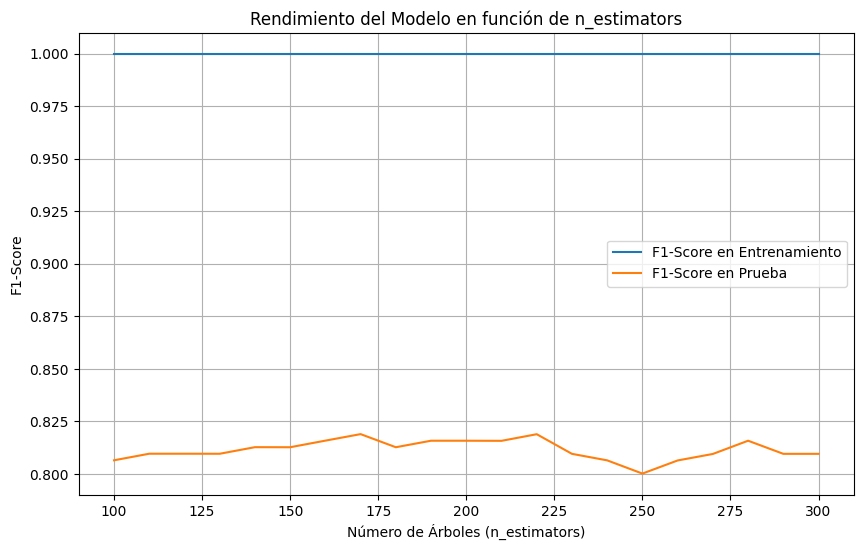

El número óptimo de árboles es: 170
Con un F1-Score en el conjunto de prueba de: 0.8189


In [11]:
# 1. Separar las características (X) y la variable objetivo (y)
X = df_model_wine.drop('quality_binary', axis=1)
y = df_model_wine['quality_binary']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Listas y variables para almacenar los resultados
f1_scores_train = []
f1_scores_test = []
n_estimators_range = range(100, 301, 10)

best_f1_score_test = 0
best_n_estimators = 0

# 4. Iterar a través del rango de n_estimators
for n in n_estimators_range:
    # Construir y entrenar el modelo
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predecir y calcular el f1-score en el conjunto de prueba
    y_pred_test = rf_model.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    f1_scores_test.append(f1_test)
    
    # Predecir y calcular el f1-score en el conjunto de entrenamiento
    y_pred_train = rf_model.predict(X_train)
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_scores_train.append(f1_train)

    # 5. Actualizar el mejor F1-Score y el número de árboles
    if f1_test > best_f1_score_test:
        best_f1_score_test = f1_test
        best_n_estimators = n

# 6. Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, f1_scores_train, label='F1-Score en Entrenamiento')
plt.plot(n_estimators_range, f1_scores_test, label='F1-Score en Prueba')
plt.title('Rendimiento del Modelo en función de n_estimators')
plt.xlabel('Número de Árboles (n_estimators)')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()

# 7. Imprimir el resultado óptimo
print(f"El número óptimo de árboles es: {best_n_estimators}")
print(f"Con un F1-Score en el conjunto de prueba de: {best_f1_score_test:.4f}")


Otra caracteristica esencial de los bosques aleatorios es la profundidad de sus arboles con el siguiente codigo buscamos encotrar el numero optimo para la misma

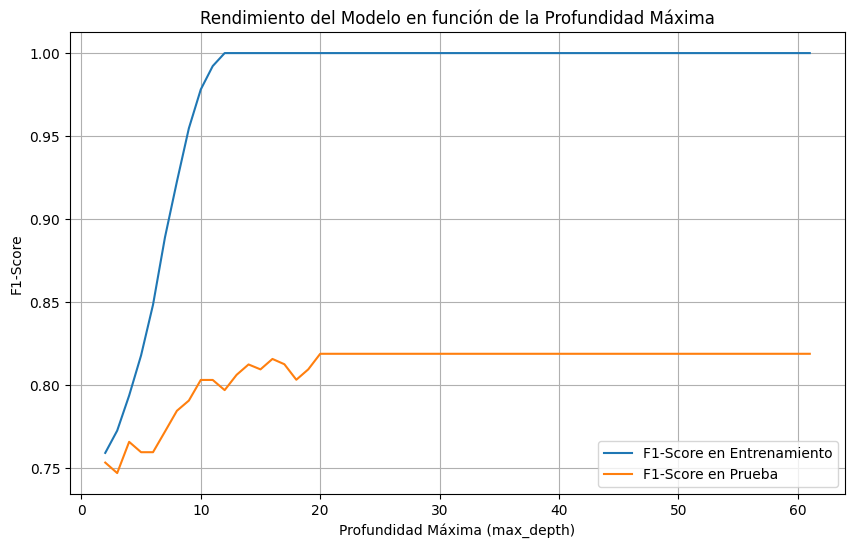

La profundidad óptima para el modelo es: 20
Con un F1-Score en el conjunto de prueba de: 0.8189


In [12]:
# Separar las características (X) y la variable objetivo (y)
X = df_model_wine.drop('quality_binary', axis=1)
y = df_model_wine['quality_binary']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Listas para almacenar los f1-scores de entrenamiento y prueba
f1_scores_train = []
f1_scores_test = []

# Rango de profundidades a probar
max_depth_range = range(2, 62)

# Variables para encontrar el mejor resultado
best_f1_score_test = 0
best_max_depth = 0

# Iterar a través de las profundidades
for depth in max_depth_range:
    # Crear y entrenar el modelo con n_estimators=175 y la profundidad actual
    rf_model = RandomForestClassifier(n_estimators=170, max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predecir y calcular el f1-score
    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)
    
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    
    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)
    
    # Lógica para encontrar el mejor resultado en el conjunto de prueba
    if f1_test > best_f1_score_test:
        best_f1_score_test = f1_test
        best_max_depth = depth

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, f1_scores_train, label='F1-Score en Entrenamiento')
plt.plot(max_depth_range, f1_scores_test, label='F1-Score en Prueba')
plt.title('Rendimiento del Modelo en función de la Profundidad Máxima')
plt.xlabel('Profundidad Máxima (max_depth)')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir el resultado óptimo
print(f"La profundidad óptima para el modelo es: {best_max_depth}")
print(f"Con un F1-Score en el conjunto de prueba de: {best_f1_score_test:.4f}")

Una vez ya sabemos que el numero optimo de arboles para nuestro algoritmo de bosques aleatorios es 175 y que la profundidad de los mismos debe ser 19 vamos a encotrar ahora el numero optimo de caracteristicas que lo haremos en el siguiente codigo

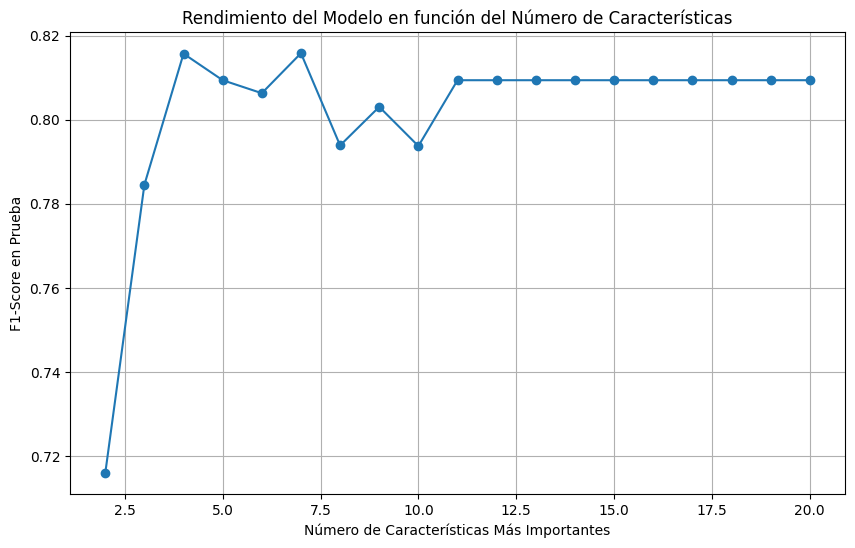

El número óptimo de características es: 7
Con un F1-Score en el conjunto de prueba de: 0.8158


In [13]:
# Separar las características (X) y la variable objetivo (y)
X = df_model_wine.drop('quality_binary', axis=1)
y = df_model_wine['quality_binary']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Parámetros óptimos que has determinado
best_n_estimators = 170
best_max_depth = 20

# 1. Entrenar un modelo con todas las características para obtener su importancia
rf_model_full = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
rf_model_full.fit(X_train, y_train)
importances = rf_model_full.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1] # Índices ordenados de mayor a menor importancia

# 2. Listas para almacenar los resultados
f1_scores = []
n_features_range = range(2, 21) # Rango de 2 a 20 características

best_f1_score_test = 0
best_n_features = 0

# 3. Iterar a través de los números de características
for n_features in n_features_range:
    # Seleccionar las 'n' características más importantes
    top_n_features_indices = sorted_indices[:n_features]
    top_n_feature_names = feature_names[top_n_features_indices]

    # Crear subconjuntos de datos con solo las características seleccionadas
    X_train_subset = X_train[top_n_feature_names]
    X_test_subset = X_test[top_n_feature_names]
    
    # Entrenar un nuevo modelo con el subconjunto de características
    rf_model_subset = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
    rf_model_subset.fit(X_train_subset, y_train)

    # Predecir y calcular el f1-score en el conjunto de prueba
    y_pred_test = rf_model_subset.predict(X_test_subset)
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    f1_scores.append(f1_test)
    
    # 4. Actualizar el mejor F1-Score y el número de características
    if f1_test > best_f1_score_test:
        best_f1_score_test = f1_test
        best_n_features = n_features

# 5. Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(n_features_range, f1_scores, marker='o')
plt.title('Rendimiento del Modelo en función del Número de Características')
plt.xlabel('Número de Características Más Importantes')
plt.ylabel('F1-Score en Prueba')
plt.grid(True)
plt.show()

# 6. Imprimir el resultado óptimo
print(f"El número óptimo de características es: {best_n_features}")
print(f"Con un F1-Score en el conjunto de prueba de: {best_f1_score_test:.4f}")

La ultima caracteristica que nos queda por encotrar su valor optimo es el numero minimo de hojas de cada arbol del bosque que es lo que vamos a realizar en el siguiente codigo

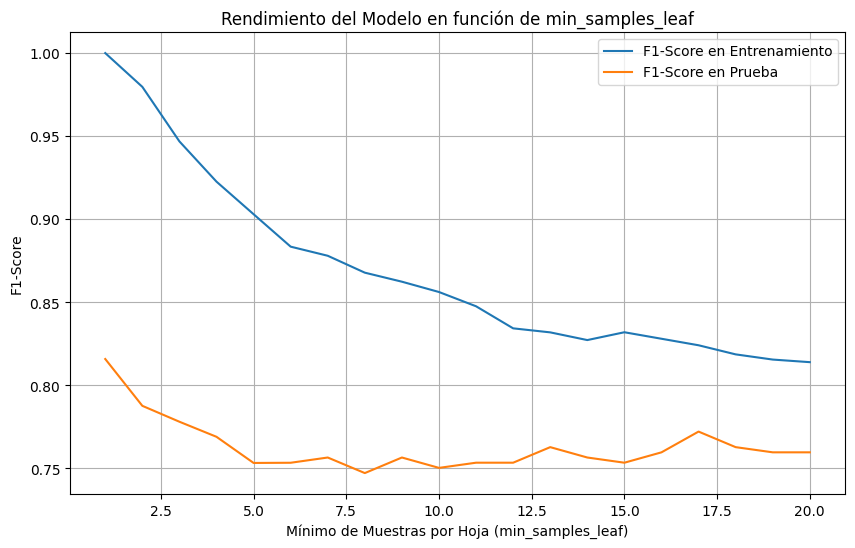

El mínimo de muestras por hoja óptimo es: 1
Con un F1-Score en el conjunto de prueba de: 0.8158


In [15]:
# Separar las características (X) y la variable objetivo (y)
X = df_model_wine.drop('quality_binary', axis=1)
y = df_model_wine['quality_binary']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Parámetros óptimos que has determinado
best_n_estimators = 170
best_max_depth = 20
best_n_features = 7 # Usaremos el número óptimo de características que encontraste

# Seleccionar las características más importantes (reemplaza con los nombres reales si los tienes)
# Por ahora, usamos las primeras 'best_n_features'
feature_importances = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42).fit(X, y).feature_importances_
sorted_features = X.columns[np.argsort(feature_importances)[::-1]]
top_features = sorted_features[:best_n_features]

X_train_subset = X_train[top_features]
X_test_subset = X_test[top_features]

# Listas para almacenar los f1-scores de entrenamiento y prueba
f1_scores_train = []
f1_scores_test = []

# Rango para probar min_samples_leaf
min_samples_leaf_range = range(1, 21)

# Variables para encontrar el mejor resultado
best_f1_score_test = 0
best_min_samples_leaf = 0

# Iterar a través del rango de min_samples_leaf
for min_leaf in min_samples_leaf_range:
    # Crear y entrenar el modelo con los parámetros óptimos y el min_samples_leaf actual
    rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                      min_samples_leaf=min_leaf, random_state=42)
    rf_model.fit(X_train_subset, y_train)

    # Predecir y calcular el f1-score
    y_pred_train = rf_model.predict(X_train_subset)
    y_pred_test = rf_model.predict(X_test_subset)
    
    f1_train = f1_score(y_train, y_pred_train, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    
    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)
    
    # Lógica para encontrar el mejor resultado en el conjunto de prueba
    if f1_test > best_f1_score_test:
        best_f1_score_test = f1_test
        best_min_samples_leaf = min_leaf

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_range, f1_scores_train, label='F1-Score en Entrenamiento')
plt.plot(min_samples_leaf_range, f1_scores_test, label='F1-Score en Prueba')
plt.title('Rendimiento del Modelo en función de min_samples_leaf')
plt.xlabel('Mínimo de Muestras por Hoja (min_samples_leaf)')
plt.ylabel('F1-Score')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir el resultado óptimo
print(f"El mínimo de muestras por hoja óptimo es: {best_min_samples_leaf}")
print(f"Con un F1-Score en el conjunto de prueba de: {best_f1_score_test:.4f}")

Con todos estos parametros ya estamos listos para crear el modelo que es lo que haremos en el siguiente notebook